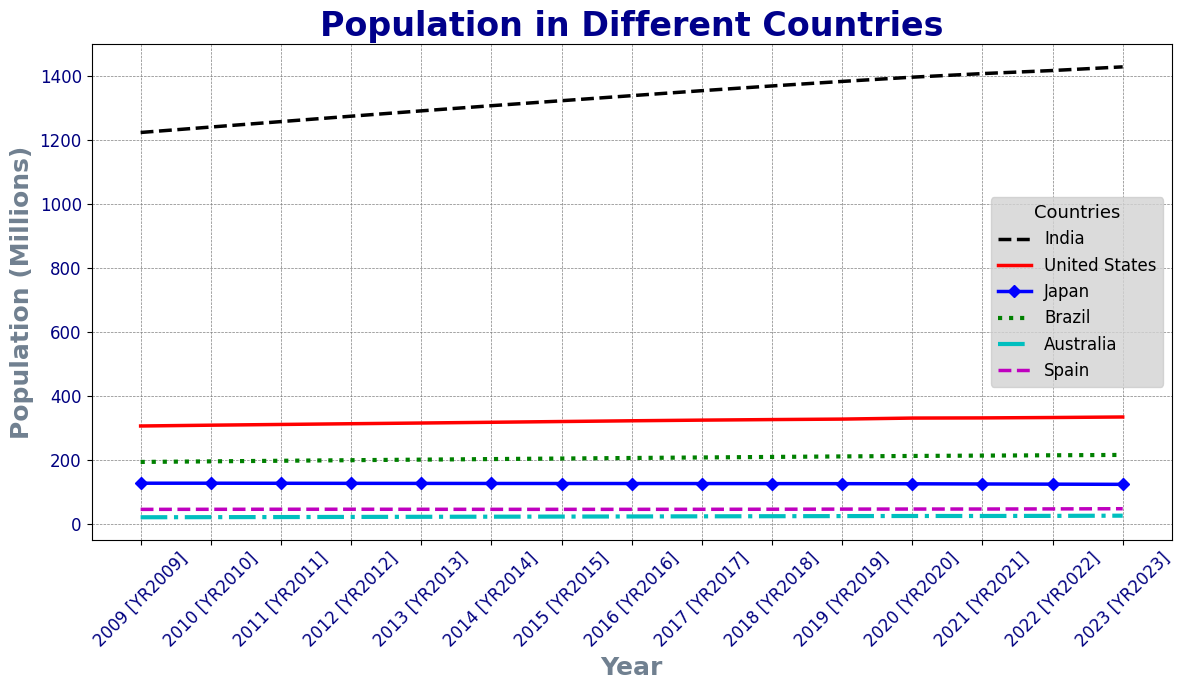

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

def lineplot(data, a1, b1, c1, d1, e1, f1):
    """
    Plot population trends for selected countries, with values in millions.

    Parameters:
    data (pd.DataFrame): DataFrame containing population data.
    a1 (str): Country name for the first line.
    b1 (str): Country name for the second line.
    c1 (str): Country name for the third line.
    d1 (str): Country name for the fourth line.
    e1 (str): Country name for the fifth line.
    f1 (str): Country name for the sixth line.

    Returns:
    None
    """

    plt.figure(figsize=(12, 7))

    # Title with custom font size and color
    plt.title("Population in Different Countries", fontsize=24,
              color="darkblue", weight="bold")

    # Customizing X and Y axis labels
    plt.xlabel("Year", fontsize=18, color="slategray", weight="bold")
    plt.ylabel("Population (Millions)", fontsize=18, color="slategray",
               weight="bold")

    # Ticks parameters
    plt.xticks(fontsize=12, color="navy", rotation=45)
    plt.yticks(fontsize=12, color="navy")

    # Adding grid with style for better readability
    plt.grid(color="gray", linestyle="--", linewidth=0.5)

    # Plotting each country's population with unique colors and styles
    plt.plot(data["Year"], data[a1] / 1e6, "k--", label=a1, linewidth=2.5)
    plt.plot(data["Year"], data[b1] / 1e6, "r-", label=b1, linewidth=2.5)
    plt.plot(data["Year"], data[c1] / 1e6, "bD-", label=c1, linewidth=2.5)
    plt.plot(data["Year"], data[d1] / 1e6, "g:", label=d1, linewidth=3.0)
    plt.plot(data["Year"], data[e1] / 1e6, "c-.", label=e1, linewidth=3.0)
    plt.plot(data["Year"], data[f1] / 1e6, "m--", label=f1, linewidth=2.5)

    # Customizing the legend with font size, position, and color
    plt.legend(title="Countries", loc="center right", fontsize=12,
               title_fontsize="13", frameon=1, facecolor="lightgray")

    # Saving and showing the plot
    plt.tight_layout()
    plt.savefig('lineplot.png')
    plt.show()

data = pd.read_csv("/content/Population.csv")

# Example of lineplot
lineplot(data.iloc[:], "India", "United States", "Japan", "Brazil", "Australia",
         "Spain")


In [66]:
import pandas as pd

# Loading the new dataset of female to male labor force
df = pd.read_csv('/content/female to male labor force (%).csv', index_col=0)

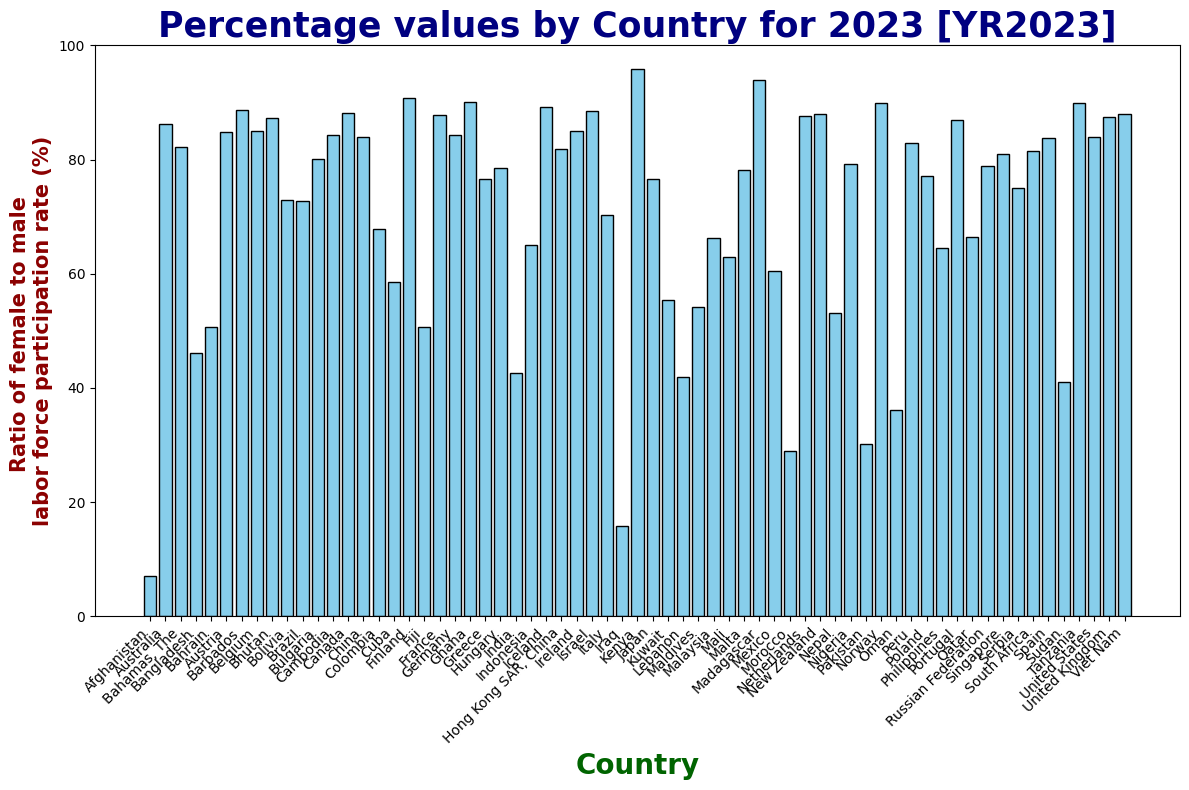

In [67]:
import matplotlib.pyplot as plt

def plot_bar(df, country_column, value_column):
    """
    Parameters:
    df (pd.DataFrame): The input DataFrame.
    country_column (str): Column name for countries on the x-axis.
    value_column (str): Column name for values (percentages) on the y-axis.

    Returns:
    None
    """
    plt.figure(figsize=(12, 8))
    plt.bar(df[country_column], df[value_column], color='skyblue',
            edgecolor='black')

    #Setting the both axis & title with different font sizes, colors, and styles
    plt.xlabel('Country', fontsize=20, color='darkgreen', fontweight='bold')
    plt.ylabel('Ratio of female to male \nlabor force participation rate (%)',
               fontsize=15, color='darkred', fontweight='bold')
    plt.title(f'Percentage values by Country for {value_column}', fontsize=25,
              color='navy', fontweight='bold')

    # Setting y-axis limit from 0 to 100 to represent percentage
    plt.ylim(0, 100)

    # Rotate x-axis labels at 25 degrees for readability
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.tight_layout()
    plt.savefig('barplot.png')

    plt.show()

# Plotting the bar to illustrate the graph for year 2023
plot_bar(df, 'Country Name', '2023 [YR2023]')

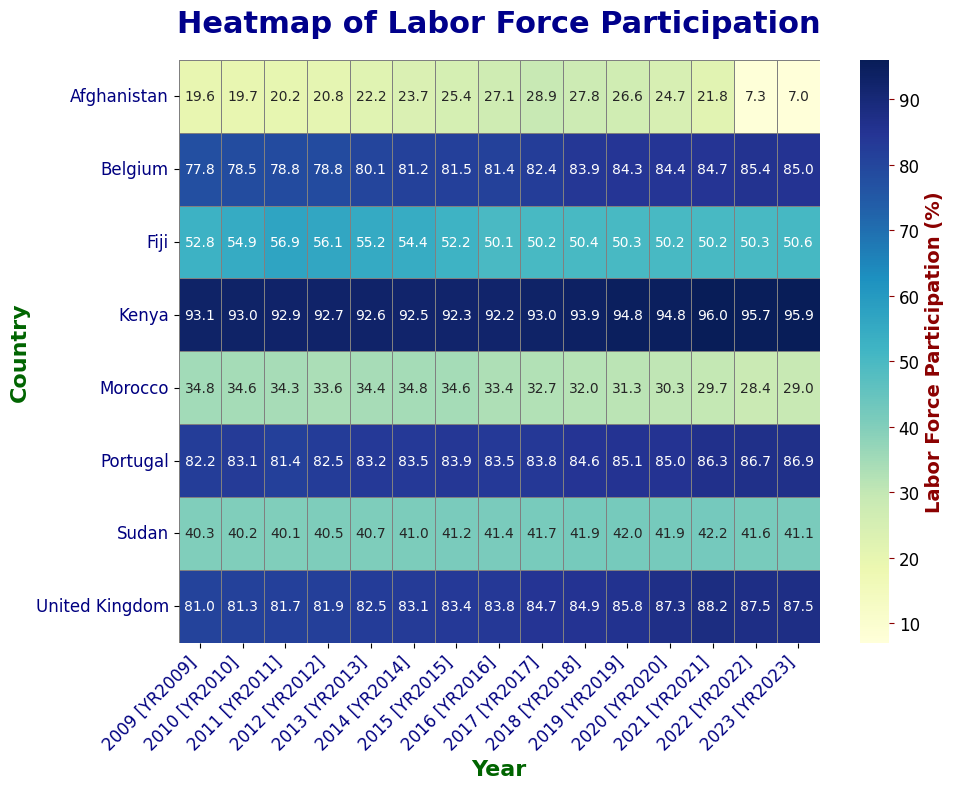

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_heatmap(data, title="Heatmap of Labor Force Participation",
                 cmap="YlGnBu"):

    """
    Generates a heatmap from a given DataFrame for selected countries.

    Parameters:
    data (pd.DataFrame): Input DataFrame for the heatmap.
    title (str): Title of the heatmap.
    cmap (str): Color map style for the heatmap.

    Returns:
    None
    """
    # Filter data for only Kenya and Afghanistan
    selected_data = data[data['Country Name'].isin(["","Afghanistan", "Belgium",
                                                    "Fiji", "Kenya", "Morocco",
                                                    "Portugal", "Sudan",
                                                    "United Kingdom"])]

    # Selecting only numeric columns (years) for the heatmap
    numeric_data = selected_data.select_dtypes(include=['number'])

    numeric_data.index = selected_data['Country Name']

    plt.figure(figsize=(10, 8))

    # Generating the heatmap using the numeric data
    sns.heatmap(numeric_data, annot=True, fmt=".1f", cmap=cmap, linewidths=0.5,
                linecolor="gray",
                cbar_kws={'label': 'Labor Force Participation (%)'})

    # Setting title, axis labels, and customizing the color bar
    plt.title(title, fontsize=22, color="darkblue", weight="bold", pad=20)
    plt.xlabel("Year", fontsize=16, color="darkgreen", weight="bold")
    plt.ylabel("Country", fontsize=16, color="darkgreen", weight="bold")

    # Customizing color bar label with larger font and color
    colorbar = plt.gca().collections[0].colorbar
    colorbar.ax.tick_params(labelsize=12, color="darkred")
    colorbar.set_label('Labor Force Participation (%)', fontsize=14,
                       color="darkred", weight="bold")

    # Customizing tick labels
    plt.xticks(rotation=45, ha="right", fontsize=12, color="navy")
    plt.yticks(fontsize=12, color="navy")

    plt.tight_layout()
    plt.savefig('heatmap.png')
    plt.show()

# calling the function to plot the heatmap for given countries
plot_heatmap(df)

In [69]:
import pandas as pd

def display_statistics(data, countries):
    """
    Display mean, median, standard deviation, skewness, kurtosis,
    and correlation matrix for selected countries.

    Parameters:
    data (pd.DataFrame): DataFrame containing the data.
    countries (list): List of country names to include in the analysis.

    Returns:
    None
    """
    # Filtering data for the specified countries
    selected_data = data[data['Country Name'].isin(countries)]

    # Selecting only numeric columns (years) for statistical analysis
    numeric_data = selected_data.select_dtypes(include=['number'])

    # Basic descriptive statistics
    print("\n--- Basic Descriptive Statistics ---")
    print(numeric_data.describe())

    # Statistical moments (mean, median, standard deviation, skewness, kurtosis)
    stats = pd.DataFrame({
        'Mean': numeric_data.mean(),
        'Median': numeric_data.median(),
        'Standard Deviation': numeric_data.std(),
        'Skewness': numeric_data.skew(),
        'Kurtosis': numeric_data.kurtosis()
    })

    print("\n--- Statistical Moments ---")
    print(stats)

    # Correlation matrix
    print("\n--- Correlation Matrix ---")
    correlation_matrix = numeric_data.corr()
    print(correlation_matrix)

# Statistics depth
selected_countries = ["Afghanistan", "Belgium", "Fiji", "Kenya", "Morocco",
                      "Portugal", "Sudan", "United Kingdom"]
display_statistics(df, selected_countries)



--- Basic Descriptive Statistics ---
       2009 [YR2009]  2010 [YR2010]  2011 [YR2011]  2012 [YR2012]  \
count       8.000000       8.000000       8.000000       8.000000   
mean       60.194533      60.653887      60.785528      60.865880   
std        26.862666      27.000771      26.751125      26.825324   
min        19.612480      19.659774      20.155168      20.778987   
25%        38.929091      38.814657      38.680291      38.768379   
50%        65.264239      66.667317      67.851418      67.455095   
75%        81.272393      81.728016      81.493269      82.054754   
max        93.143749      93.003991      92.867494      92.731536   

       2013 [YR2013]  2014 [YR2014]  2015 [YR2015]  2016 [YR2016]  \
count       8.000000       8.000000       8.000000       8.000000   
mean       61.365523      61.762264      61.815645      61.605113   
std        26.655581      26.472666      26.352544      26.254622   
min        22.217896      23.749065      25.375733      27.10292